# Clustering(군집)   
   
- 특징
 - 종속변수(속성, label, y) 없음
 - unsupervised learning
 - 새로운 데이터를 예측하는 것이 아니라   
 전체적인 데이터 구조를 파악하는데 이용
 - 단점? : 분석한 결과에 대한 검증법이 불가능
 - ex) 고객 DB => 알고리즘 적용 => 패턴 추출 => cluster 분석


# K-means Clustering   
   
unsupervised learning => label이 없는 데이터만으로 학습   
   
데이터를 k개의 클러스터로 분류   
(우리가 원하는 클래스의 갯수가 k 개)

# K-Means 동작 과정   
1. 내가 가진 데이터(샘플)들을 뿌리고
2. k개의 중심점
3. 각각의 중심점을 기준으로 모든 데이터가 얼마나 떨어져 있는지 계산
4. 각각의 데이터와 가장 가까운 중심점에 포인터 할당
(각 데이터가 속할 그룹 지정)
5. 각 중심점에 할당된 모든 데이터 포인터를 기준으로 공간 분리
6. 분리된 공간에 속해있는 포인터들의 위치의 평균 계산
7. 평균을 기준으로 중심점을 이동(재조정)
8. 중심점 이동이 일어나지 않을 때까지 1~7 반복
9. 종료

# 이미지 분할 => 색상 분할   
물체 감지, 추적 시스템에 사용할 수 있는 기술   
이미지 자체를 컴퓨터가 해석을 하는 것이 아니고,   
이미지 자체를 조금 더 의미 있는 이미지로 변경하는 것이 목표


In [3]:
!pip install opencv-python==4.4.0.40

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 6.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [4]:
import cv2
import os
from sklearn.cluster import KMeans
from imageio import imread

In [7]:
# 이미지 파일 하나
img = imread('predator.jpg')
print(img) #BGR로 표현된 상태(삼원색)


[[[ 90  75  56]
  [ 91  76  57]
  [ 92  77  58]
  ...
  [240 175  71]
  [240 175  71]
  [240 175  71]]

 [[ 91  76  57]
  [ 91  76  57]
  [ 92  77  58]
  ...
  [238 173  69]
  [239 174  70]
  [239 174  70]]

 [[ 92  77  58]
  [ 92  77  58]
  [ 93  78  59]
  ...
  [235 172  69]
  [237 172  70]
  [237 172  70]]

 ...

 [[ 62  53  48]
  [ 63  54  49]
  [ 64  55  50]
  ...
  [ 55  39  16]
  [ 54  38  15]
  [ 54  38  15]]

 [[ 64  55  50]
  [ 65  56  51]
  [ 66  57  52]
  ...
  [ 54  38  15]
  [ 54  38  15]
  [ 53  37  14]]

 [[ 64  55  50]
  [ 65  56  51]
  [ 66  57  52]
  ...
  [ 54  38  15]
  [ 54  38  15]
  [ 53  37  14]]]


<ipython-input-7-76c9f8c0404b>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('predator.jpg')


# 색을 표현하는 방법 : RGB(red, green, blue) :   
이 세가지 색을 섞거나 빼서 원하는 색을 만드는 방식   
각각의 색상을 0 ~ 255로 표현,   
값이 커지면 커질수록 해당하는 색상의 빛이 밝아짐   
RGB(255,255,255) : 흰색   
RGB(0,0,0) : 검정색   
-=-=-=-=-=-=-=-=   
OpenCV 에서는 BGR 방식 채택 (방향이 반대)

In [9]:
# BGR => RGB 컨버트

convert_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(convert_img)

print(img.shape)
# (높이, 너비, 컬러 채널)
# 컬러 채널 : R,G,B - 각각의 픽셀에 RGB 강도를 담은 벡터가 들어있음


(170, 296, 3)


In [12]:
import numpy as np

vec = img.reshape(-1,3) # 행 하나당 열 3개가 되도록 재구성
vec = np.float32(vec)
print(vec)

[[90. 75. 56.]
 [91. 76. 57.]
 [92. 77. 58.]
 ...
 [54. 38. 15.]
 [54. 38. 15.]
 [53. 37. 14.]]


In [16]:
criteria = (cv2.TermCriteria_EPS +cv2.TermCriteria_MAX_ITER, 10, 1.0)
# criteria : 반복에 대한 설정, 기준에 충족되는 순간 알고리즘 반복이 멈추도록 하는 옵션
# 반복을 멈추게 하는 옵션 종류 3가지
# cv2.TermCriteria_EPS : 특정 정확도에 도달하면 알고리즘 중지
# cv2.TermCriteria_MAX_ITER : 특정 반복횟수에 도달하면 알고리즘 중지
# cv2.TermCriteria_EPS +cv2.TermCriteria_MAX_ITER : 두 조건중 하나라도 만족하면 알고리즘 중지

# max_iter : 최대 반복횟수를 지정하는 [정수]
# epsilon : 요구되는 특정 정확도

K = 4 # 클러스터의 갯수 (분류 목표로 하는 색상 수?)
attempts = 10 # 시도 횟수
ret, label, center = cv2.kmeans(vec, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

# ret : 밀집도
# label : 어느 클러스터에 속하게 되는지
# center : 클러스터의 중심 좌표

# cv2.kmeans 파라미터
# data : 학습 데이터 행렬 (np.float32)
# K : 군집의 갯수 (cluster의 수)
# best Labels : 각 샘플의 군집번호 행렬 - None
# criteria : 종료 기준(type, max count, epsilon(정확도))를 튜플 형태로 받음
# attempts : 초기 레이블로 반복하는 횟수
# flags : 초기 중앙 설정법
#       cv2.KMEANS_PP_CENTERS : 시간 좀 걸리는 대신, 정확도 높게
#       cv2.KMEANS_RANDOM_CENTERS : 정확도는 떨어지지만, 시간은 덜 들게

# clustering 결과를 이용해 출력할 내용 생성
center = np.uint8(center)

 # 중심점 좌표 받기 => 각 필셀마다 K개 군집 중심 색상 치환
res = center[label.flatten()]
result = res.reshape((img.shape)) # 원본 이미지와 동일한 형태로 치환
#################################################
K = 7 # 클러스터의 갯수 (분류 목표로 하는 색상 수?)
attempts = 10 # 시도 횟수
ret, label, center = cv2.kmeans(vec, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

 # 중심점 좌표 받기 => 각 필셀마다 K개 군집 중심 색상 치환
res = center[label.flatten()]
result1 = res.reshape((img.shape)) # 원본 이미지와 동일한 형태로 치환
###################################################
K = 10 # 클러스터의 갯수 (분류 목표로 하는 색상 수?)
attempts = 10 # 시도 횟수
ret, label, center = cv2.kmeans(vec, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

 # 중심점 좌표 받기 => 각 필셀마다 K개 군집 중심 색상 치환
res = center[label.flatten()]
result2 = res.reshape((img.shape)) # 원본 이미지와 동일한 형태로 치환
###################################################


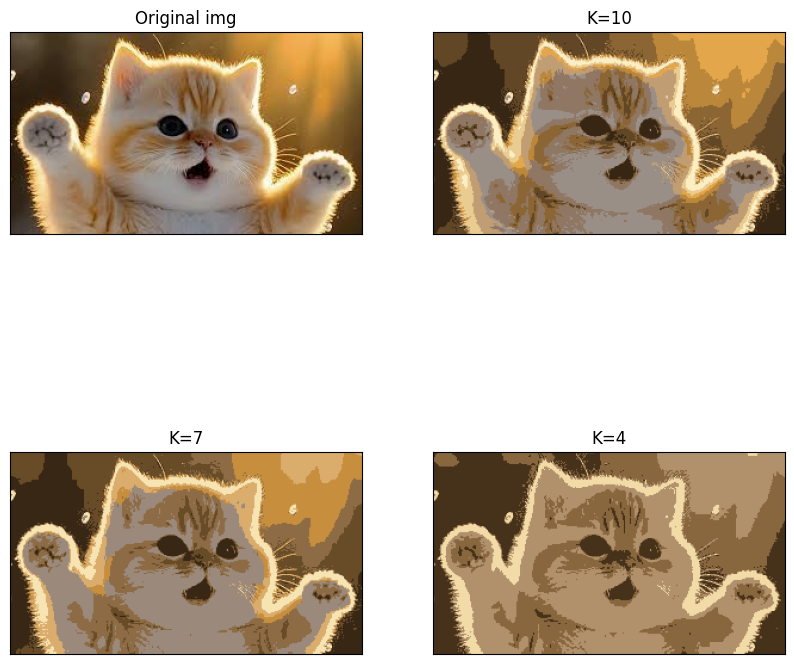

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original img'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(result2)
plt.title('K=10'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(result1)
plt.title('K=7'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(result)
plt.title('K=4'), plt.xticks([]), plt.yticks([])

plt.show()